/home/sspc/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sspc/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sspc/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sspc/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWa

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 60us/sample - loss: 0.5252 - acc: 0.8159 - val_loss: 0.4542 - val_acc: 0.8343
Epoch 2/10
48000/48000 [==============================] - 2s 46us/sample - loss: 0.3923 - acc: 0.8584 - val_loss: 0.3915 - val_acc: 0.8642
Epoch 3/10
48000/48000 [==============================] - 2s 44us/sample - loss: 0.3534 - acc: 0.8702 - val_loss: 0.3802 - val_acc: 0.8608
Epoch 4/10
48000/48000 [==============================] - 2s 44us/sample - loss: 0.3287 - acc: 0.8809 - val_loss: 0.3565 - val_acc: 0.8722
Epoch 5/10
48000/48000 [==============================] - 3s 61us/sample - loss: 0.3055 - acc: 0.8885 - val_loss: 0.3916 - val_acc: 0.8590
Epoch 6/10
48000/48000 [==============================] - 2s 46us/sample - loss: 0.2892 - acc: 0.8932 - val_loss: 0.3298 - val_acc: 0.884

KeyError: 'accuracy'

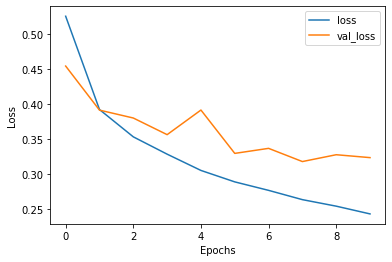

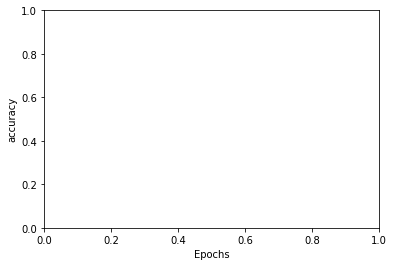

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.activations import softmax
from tensorflow.keras.losses import sparse_categorical_crossentropy

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

x_train = x_train / 255.0
x_test = x_test / 255.0

# plt.figure(figsize=(10,10))
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(x_train[i], cmap=plt.cm.binary)
#     plt.xlabel(class_names[y_train[i]])
# plt.show()

my_model = Sequential()

my_model.add(Flatten(input_shape=(28, 28)))
my_model.add(Dense(128, activation='relu'))
my_model.add(Dense(10, activation=softmax))

my_model.compile(optimizer='adam', loss=sparse_categorical_crossentropy, metrics=['accuracy'])

trained_model = my_model.fit(x_train, y_train, epochs=10, validation_split=0.2)


history = trained_model.history

test_loss, test_acc = my_model.evaluate(x_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.legend(['acc', 'val_acc'])

plt.show()


In [7]:
matrix = tf.math.confusion_matrix(class_names, my_model.predict(x_test)[0])

In [20]:
with tf.Session() as sess:
    print(matrix.eval())


UnimplementedError: Cast string to int64 is not supported
	 [[node confusion_matrix_4/Cast_1 (defined at <ipython-input-7-c9189716d701>:1) ]]

Original stack trace for 'confusion_matrix_4/Cast_1':
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/sspc/.local/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/sspc/.local/lib/python3.6/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/home/sspc/.local/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 583, in start
    self.io_loop.start()
  File "/home/sspc/.local/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 438, in run_forever
    self._run_once()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 1451, in _run_once
    handle._run()
  File "/usr/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/home/sspc/.local/lib/python3.6/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/sspc/.local/lib/python3.6/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/sspc/.local/lib/python3.6/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/home/sspc/.local/lib/python3.6/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/home/sspc/.local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/sspc/.local/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/sspc/.local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/sspc/.local/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/sspc/.local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 545, in execute_request
    user_expressions, allow_stdin,
  File "/home/sspc/.local/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/sspc/.local/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 300, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/sspc/.local/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/sspc/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2858, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/sspc/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2886, in _run_cell
    return runner(coro)
  File "/home/sspc/.local/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/home/sspc/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3063, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/sspc/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3254, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/home/sspc/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-c9189716d701>", line 1, in <module>
    matrix = tf.math.confusion_matrix(class_names, my_model.predict(x_test)[0])
  File "/home/sspc/.local/lib/python3.6/site-packages/tensorflow/python/ops/confusion_matrix.py", line 261, in confusion_matrix_v1
    name)
  File "/home/sspc/.local/lib/python3.6/site-packages/tensorflow/python/ops/confusion_matrix.py", line 157, in confusion_matrix
    labels = math_ops.cast(labels, dtypes.int64)
  File "/home/sspc/.local/lib/python3.6/site-packages/tensorflow/python/util/dispatch.py", line 180, in wrapper
    return target(*args, **kwargs)
  File "/home/sspc/.local/lib/python3.6/site-packages/tensorflow/python/ops/math_ops.py", line 689, in cast
    x = gen_math_ops.cast(x, base_type, name=name)
  File "/home/sspc/.local/lib/python3.6/site-packages/tensorflow/python/ops/gen_math_ops.py", line 2183, in cast
    "Cast", x=x, DstT=DstT, Truncate=Truncate, name=name)
  File "/home/sspc/.local/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/home/sspc/.local/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/home/sspc/.local/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3616, in create_op
    op_def=op_def)
  File "/home/sspc/.local/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()
